In [1]:
import pandas as pd
import numpy as np

# Veriyi yükle
df_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')

In [2]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Print all column names in the DataFrame
print(df_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [4]:
df_test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')

In [5]:
# Fill NaN values in source columns with zero before calculation
df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(0)
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(0)
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(0)

# Create the new column based on the weighted sum
df_train['NEW_EXT_SOURCE'] = (df_train['EXT_SOURCE_2'] * 0.4 + 
                              df_train['EXT_SOURCE_3'] * 0.33 + 
                              df_train['EXT_SOURCE_1'] * 0.27).round(6)


In [6]:
df_train['PAYMENT_RATE'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT'].round(1)
df_test['PAYMENT_RATE'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT'].round(1)

In [7]:
# Calculate the mean of the PAYMENT_RATE column, excluding NaN values
payment_rate_mean = df_train['PAYMENT_RATE'].mean()

# Fill NaN values in the PAYMENT_RATE column with the calculated mean
df_train['PAYMENT_RATE'] = df_train['PAYMENT_RATE'].fillna(payment_rate_mean)


In [8]:
# Calculate the mean of the PAYMENT_RATE column, excluding NaN values
payment_rate_mean = df_test['PAYMENT_RATE'].mean()

# Fill NaN values in the PAYMENT_RATE column with the calculated mean
df_train['PAYMENT_RATE'] = df_test['PAYMENT_RATE'].fillna(payment_rate_mean)


In [9]:
selected_columns = ['SK_ID_CURR','TARGET','CODE_GENDER', 'DAYS_BIRTH','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NEW_EXT_SOURCE','PAYMENT_RATE']
df_train= df_train[selected_columns].copy()


In [10]:
# Fill NaN values in source columns with zero before calculation in df_test
df_test['EXT_SOURCE_1'] = df_test['EXT_SOURCE_1'].fillna(0)
df_test['EXT_SOURCE_2'] = df_test['EXT_SOURCE_2'].fillna(0)
df_test['EXT_SOURCE_3'] = df_test['EXT_SOURCE_3'].fillna(0)

# Assuming df_test is your DataFrame that already includes EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3
df_test['NEW_EXT_SOURCE'] = (df_test['EXT_SOURCE_2'] * 0.4 + 
                              df_test['EXT_SOURCE_3'] * 0.33 + 
                              df_test['EXT_SOURCE_1'] * 0.27).round(6)

In [11]:
selected_columns = ['SK_ID_CURR','CODE_GENDER', 'DAYS_BIRTH', 'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NEW_EXT_SOURCE','PAYMENT_RATE']
df_test= df_test[selected_columns].copy()

In [12]:
df_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,DAYS_BIRTH,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,FLAG_OWN_CAR,FLAG_OWN_REALTY,NEW_EXT_SOURCE,PAYMENT_RATE
0,100002,1,M,-9461,0,202500.0,406597.5,24700.5,Secondary / secondary special,-637,N,Y,0.173593,0.036147
1,100003,0,F,-16765,0,270000.0,1293502.5,35698.5,Higher education,-1188,N,N,0.332940,0.077973
2,100004,0,M,-19046,0,67500.0,135000.0,6750.0,Secondary / secondary special,-225,Y,Y,0.463122,0.105202
3,100006,0,F,-19005,0,135000.0,312682.5,29686.5,Secondary / secondary special,-3039,N,Y,0.260177,0.031123
4,100007,0,M,-19932,0,121500.0,513000.0,21865.5,Secondary / secondary special,-3038,N,Y,0.129095,0.051266


In [13]:
df_test.head()

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,FLAG_OWN_CAR,FLAG_OWN_REALTY,NEW_EXT_SOURCE,PAYMENT_RATE
0,100001,F,-19241,0,135000.0,568800.0,20560.5,Higher education,-2329,N,Y,0.571709,0.036147
1,100005,M,-18064,0,99000.0,222768.0,17370.0,Secondary / secondary special,-4469,N,Y,0.412087,0.077973
2,100013,M,-20038,0,202500.0,663264.0,69777.0,Higher education,-4458,Y,Y,0.481542,0.105202
3,100028,F,-13976,2,315000.0,1575000.0,49018.5,Secondary / secondary special,-1866,N,Y,0.548011,0.031123
4,100038,M,-13040,1,180000.0,625500.0,32067.0,Secondary / secondary special,-2191,Y,N,0.224854,0.051266


In [14]:
def grab_col_names(dataframe, cat_th=4, car_th=20):


    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')



    return cat_cols, cat_but_car, num_cols

In [15]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_train)

Observations: 307511
Variables: 14
cat_cols: 5
num_cols: 9
cat_but_car: 0
num_but_cat: 1


In [16]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_test)

Observations: 48744
Variables: 13
cat_cols: 4
num_cols: 9
cat_but_car: 0
num_but_cat: 0


In [17]:
# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.01, up_quantile=0.99):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [18]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "TARGET":
      print(col, check_outlier(df_train, col))

SK_ID_CURR False
DAYS_BIRTH False
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT False
AMT_ANNUITY True
DAYS_EMPLOYED False
NEW_EXT_SOURCE False
PAYMENT_RATE False


In [19]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
for col in num_cols:
    if col != "TARGET":
        replace_with_thresholds(df_train,col)

/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-420093.85000000003' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-575101.7500000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variab

In [21]:
for col in num_cols:
    if col != "TARGET":
        replace_with_thresholds(df_test,col)

/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-420213.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-574440.2000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low

In [22]:
# Convert annual income to integer
df_train['Annual_Income'] = df_train['AMT_INCOME_TOTAL'].astype(int)

# Convert credit amount to integer
df_train['Loan_Amount'] = df_train['AMT_CREDIT'].astype(int)

# Calculate loan term as the ratio of credit amount to annuity amount, handling infinities and missing values
if 'AMT_ANNUITY' in df_train.columns:
    df_train['Loan_Term'] = df_train['AMT_CREDIT'] / df_train['AMT_ANNUITY']
    df_train['Loan_Term'] = df_train['Loan_Term'].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
    df_train['Loan_Term'] = df_train['Loan_Term'].fillna(0)  # Fill NaN values with zero
    df_train['Loan_Term'] = df_train['Loan_Term'].astype(int)  # Convert to integer
else:
    df_train['Loan_Term'] = 0  # Assign zero if AMT_ANNUITY is not present

# Calculate total years of employment
df_train['Employment_Years'] = (df_train['DAYS_EMPLOYED'].abs() / 365).astype(int)

# Convert days of birth from negative to positive and calculate age in years
df_train['Age'] = (df_train['DAYS_BIRTH'].abs() / 365).astype(int)

# Convert number of children to integer
df_train['CNT_CHILDREN'] = df_train['CNT_CHILDREN'].astype(int)


In [23]:
# Yıllık Gelir
df_test['Annual_Income'] = df_test['AMT_INCOME_TOTAL'].astype(int)

# Kredi Miktarı
df_test['Loan_Amount'] = df_test['AMT_CREDIT'].astype(int)

# Kredi Süresi
if 'AMT_ANNUITY' in df_test.columns:
    df_test['Loan_Term'] = df_test['AMT_CREDIT'] / df_test['AMT_ANNUITY']
    df_test['Loan_Term'] = df_test['Loan_Term'].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
    df_test['Loan_Term'] = df_test['Loan_Term'].fillna(0)  # Fill NaN values with zero
    df_test['Loan_Term'] = df_test['Loan_Term'].astype(int)  # Convert loan term into an integer
else:
    df_test['Loan_Term'] = 0  # Default loan term to zero if 'AMT_ANNUITY' column is missing

# Total Employment Years
df_test['Employment_Years'] = (df_test['DAYS_EMPLOYED'].abs() / 365).astype(int)

# Convert negative values in DAYS_BIRTH to positive and then to age in years
df_test['Age'] = (df_test['DAYS_BIRTH'].abs() / 365).astype(int)

# Convert number of children to integer
df_test['CNT_CHILDREN'] = df_test['CNT_CHILDREN'].astype(int)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'CODE_GENDER' column in df_train
df_train['CODE_GENDER_encoded'] = label_encoder.fit_transform(df_train['CODE_GENDER'])

# Reset the encoder and encode 'NAME_EDUCATION_TYPE' column in df_train
label_encoder = LabelEncoder()  # Reinitialize the LabelEncoder
df_train['NAME_EDUCATION_TYPE_encoded'] = label_encoder.fit_transform(df_train['NAME_EDUCATION_TYPE'])

# Reset the encoder and encode 'FLAG_OWN_CAR' column in df_train
label_encoder = LabelEncoder()  # Reinitialize the LabelEncoder
df_train['FLAG_OWN_CAR_encoded'] = label_encoder.fit_transform(df_train['FLAG_OWN_CAR'])

# Reset the encoder and encode 'FLAG_OWN_REALTY' column in df_train
label_encoder = LabelEncoder()  # Reinitialize the LabelEncoder
df_train['FLAG_OWN_REALTY_encoded'] = label_encoder.fit_transform(df_train['FLAG_OWN_REALTY'])



In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'CODE_GENDER' column in df_test
df_test['CODE_GENDER_encoded'] = label_encoder.fit_transform(df_test['CODE_GENDER'])

# Reset the encoder and encode 'NAME_EDUCATION_TYPE' column in df_test
label_encoder = LabelEncoder()  # Reinitialize the LabelEncoder
df_test['NAME_EDUCATION_TYPE_encoded'] = label_encoder.fit_transform(df_test['NAME_EDUCATION_TYPE'])

# Reset the encoder and encode 'FLAG_OWN_CAR' column in df_test
label_encoder = LabelEncoder()  # Reinitialize the LabelEncoder
df_test['FLAG_OWN_CAR_encoded'] = label_encoder.fit_transform(df_test['FLAG_OWN_CAR'])

# Reset the encoder and encode 'FLAG_OWN_REALTY' column in df_test
label_encoder = LabelEncoder()  # Reinitialize the LabelEncoder
df_test['FLAG_OWN_REALTY_encoded'] = label_encoder.fit_transform(df_test['FLAG_OWN_REALTY'])


In [26]:
df_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,DAYS_BIRTH,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,...,PAYMENT_RATE,Annual_Income,Loan_Amount,Loan_Term,Employment_Years,Age,CODE_GENDER_encoded,NAME_EDUCATION_TYPE_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded
0,100002.0,1,M,-9461,0,202500.0,406597.5,24700.5,Secondary / secondary special,-637.0,...,0.036147,202500,406597,16,1,25,1,4,0,1
1,100003.0,0,F,-16765,0,270000.0,1293502.5,35698.5,Higher education,-1188.0,...,0.077973,270000,1293502,36,3,45,0,1,0,0
2,100004.0,0,M,-19046,0,67500.0,135000.0,6750.0,Secondary / secondary special,-225.0,...,0.105202,67500,135000,20,0,52,1,4,1,1
3,100006.0,0,F,-19005,0,135000.0,312682.5,29686.5,Secondary / secondary special,-3039.0,...,0.031123,135000,312682,10,8,52,0,4,0,1
4,100007.0,0,M,-19932,0,121500.0,513000.0,21865.5,Secondary / secondary special,-3038.0,...,0.051266,121500,513000,23,8,54,1,4,0,1


In [27]:
df_test.head()

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,FLAG_OWN_CAR,...,PAYMENT_RATE,Annual_Income,Loan_Amount,Loan_Term,Employment_Years,Age,CODE_GENDER_encoded,NAME_EDUCATION_TYPE_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded
0,100001.0,F,-19241,0,135000.0,568800.0,20560.5,Higher education,-2329.0,N,...,0.036147,135000,568800,27,6,52,0,1,0,1
1,100005.0,M,-18064,0,99000.0,222768.0,17370.0,Secondary / secondary special,-4469.0,N,...,0.077973,99000,222768,12,12,49,1,4,0,1
2,100013.0,M,-20038,0,202500.0,663264.0,69777.0,Higher education,-4458.0,Y,...,0.105202,202500,663264,9,12,54,1,1,1,1
3,100028.0,F,-13976,2,315000.0,1575000.0,49018.5,Secondary / secondary special,-1866.0,N,...,0.031123,315000,1575000,32,5,38,0,4,0,1
4,100038.0,M,-13040,1,180000.0,625500.0,32067.0,Secondary / secondary special,-2191.0,Y,...,0.051266,180000,625500,19,6,35,1,4,1,0


In [28]:
# Fill NaN values with the mean of each column in df_train
df_train['Annual_Income'] = df_train['Annual_Income'].fillna(df_train['Annual_Income'].mean())
df_train['Loan_Amount'] = df_train['Loan_Amount'].fillna(df_train['Loan_Amount'].mean())
df_train['Loan_Term'] = df_train['Loan_Term'].fillna(df_train['Loan_Term'].mean())
df_train['Employment_Years'] = df_train['Employment_Years'].fillna(df_train['Employment_Years'].mean())
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
# Calculate the mean of 'CNT_CHILDREN', round it, and fill NaN values with it
mean_children = int(round(df_train['CNT_CHILDREN'].mean()))
df_train['CNT_CHILDREN'] = df_train['CNT_CHILDREN'].fillna(mean_children).astype(int)

In [29]:
# Fill NaN values with the mean of each column in df_test
df_test['Annual_Income'] = df_test['Annual_Income'].fillna(df_test['Annual_Income'].mean())
df_test['Loan_Amount'] = df_test['Loan_Amount'].fillna(df_test['Loan_Amount'].mean())
df_test['Loan_Term'] = df_test['Loan_Term'].fillna(df_test['Loan_Term'].mean())
df_test['Employment_Years'] = df_test['Employment_Years'].fillna(df_test['Employment_Years'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
# Calculate the mean of 'CNT_CHILDREN', round it, and fill NaN values with it
mean_children = int(round(df_test['CNT_CHILDREN'].mean()))
df_test['CNT_CHILDREN'] = df_test['CNT_CHILDREN'].fillna(mean_children).astype(int)

In [30]:
# Fill NaN values with the mode of each categorical column in df_train
df_train['CODE_GENDER_encoded'] = df_train['CODE_GENDER_encoded'].fillna(df_train['CODE_GENDER_encoded'].mode()[0])
df_train['NAME_EDUCATION_TYPE_encoded'] = df_train['NAME_EDUCATION_TYPE_encoded'].fillna(df_train['NAME_EDUCATION_TYPE_encoded'].mode()[0])
df_train['FLAG_OWN_CAR_encoded'] = df_train['FLAG_OWN_CAR_encoded'].fillna(df_train['FLAG_OWN_CAR_encoded'].mode()[0])
df_train['FLAG_OWN_REALTY_encoded'] = df_train['FLAG_OWN_REALTY_encoded'].fillna(df_train['FLAG_OWN_REALTY_encoded'].mode()[0])

In [31]:
# Fill NaN values with the mode of each column in df_test
df_test['CODE_GENDER_encoded'] = df_test['CODE_GENDER_encoded'].fillna(df_test['CODE_GENDER_encoded'].mode()[0])
df_test['NAME_EDUCATION_TYPE_encoded'] = df_test['NAME_EDUCATION_TYPE_encoded'].fillna(df_test['NAME_EDUCATION_TYPE_encoded'].mode()[0])
df_test['FLAG_OWN_CAR_encoded'] = df_test['FLAG_OWN_CAR_encoded'].fillna(df_test['FLAG_OWN_CAR_encoded'].mode()[0])
df_test['FLAG_OWN_REALTY_encoded'] = df_test['FLAG_OWN_REALTY_encoded'].fillna(df_test['FLAG_OWN_REALTY_encoded'].mode()[0])

In [32]:
df_train.shape

(307511, 23)

In [33]:
df_test.shape

(48744, 22)

In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Define features for df_train
features = ['CNT_CHILDREN','Annual_Income', 'Loan_Amount', 'Loan_Term', 'Employment_Years', 'Age',
            'CODE_GENDER_encoded', 'NAME_EDUCATION_TYPE_encoded', 'FLAG_OWN_CAR_encoded', 'FLAG_OWN_REALTY_encoded','NEW_EXT_SOURCE', 'PAYMENT_RATE']


# Splitting df_train into training and validation sets
X = df_train[features]
y = df_train['TARGET']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LightGBM data containers
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Set the model parameters with added regularization and bagging
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'min_data_in_leaf': 20,   # higher values can prevent overfitting
    'lambda_l1': 0.5,         # L1 regularization
    'bagging_fraction': 0.8,  # enables bagging (subsampling)
    'bagging_freq': 5         # perform bagging every 5 iterations
}

# Train the model with early stopping
num_round = 1000
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[val_data])

# Evaluate the model on the validation set
y_val_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
y_val_pred_binary = [1 if pred > 0.4 else 0 for pred in y_val_pred]  # Adjusting threshold as needed
accuracy_lgbm = accuracy_score(y_val, y_val_pred_binary)
print("Validation Accuracy:", accuracy_lgbm)


[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
Validation Accuracy: 0.9190283400809717


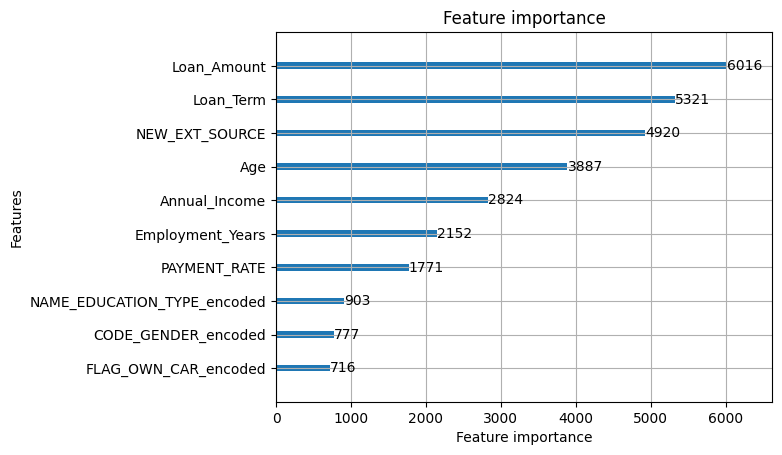

In [35]:
import matplotlib.pyplot as plt

lgb.plot_importance(bst, max_num_features=10)
plt.show()


In [36]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Calculate additional metrics
roc_auc = roc_auc_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred_binary)
recall = recall_score(y_val, y_val_pred_binary)
f1 = f1_score(y_val, y_val_pred_binary)

print(f"ROC-AUC: {roc_auc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


ROC-AUC: 0.7354040137506681, Precision: 0.4134078212290503, Recall: 0.014952515659729238, F1-Score: 0.028861154446177848


In [37]:
import pandas as pd
import numpy as np
import lightgbm as lgb

def predict_single_instance(model, feature_values):
    """
    Predicts the output for a single data instance using the LightGBM model.
    
    Parameters:
        model (lgb.Booster): The trained LightGBM model.
        feature_values (dict): A dictionary containing the feature values for a single instance.
        
    Returns:
        float: The predicted probability (since binary classification might benefit from the probability 
        output for certain applications).
    """
    # Ensure the feature values are provided in the correct order
    expected_features = ['CNT_CHILDREN', 'Annual_Income', 'Loan_Amount', 'Loan_Term', 'Employment_Years', 
                         'Age','CODE_GENDER_encoded', 'NAME_EDUCATION_TYPE_encoded', 'FLAG_OWN_CAR_encoded', 
                         'FLAG_OWN_REALTY_encoded', 'NEW_EXT_SOURCE', 'PAYMENT_RATE']

    # Create a DataFrame for the single instance
    input_df = pd.DataFrame([feature_values], columns=expected_features)
    
    # Predict using the model
    pred_prob = model.predict(input_df, num_iteration=model.best_iteration)
    
    return pred_prob[0]


In [38]:

# Example of how to use the function
features_pred = {
    'CNT_CHILDREN': 2,
    'Annual_Income': 50000,
    'Loan_Amount': 200000,
    'Loan_Term': 30,
    'Employment_Years': 5,
    'Age': 35,
    'CODE_GENDER_encoded': 1,
    'NAME_EDUCATION_TYPE_encoded': 1,
    'FLAG_OWN_CAR_encoded': 0,
    'FLAG_OWN_REALTY_encoded': 1,
    'NEW_EXT_SOURCE': 0.35,
    'PAYMENT_RATE': 0.03
}

# Assuming `bst` is your trained LightGBM model loaded elsewhere in your code
predicted_probability = predict_single_instance(bst, features_pred)
print("Predicted Probability of Default:", predicted_probability)

Predicted Probability of Default: 0.09537779881261176


In [39]:
import pandas as pd
import numpy as np
import lightgbm as lgb

def predict_single_instance(model, feature_values):
    """
    Predicts the risk category for a single data instance using the LightGBM model based on the predicted probability.
    
    Parameters:
        model (lgb.Booster): The trained LightGBM model.
        feature_values (dict): A dictionary containing the feature values for a single instance.
        
    Returns:
        str: "No Risk" if the predicted probability is less than 0.2, otherwise "Risk".
    """
    # Ensure the feature values are provided in the correct order
    expected_features = ['CNT_CHILDREN', 'Annual_Income', 'Loan_Amount', 'Loan_Term', 'Employment_Years', 
                         'Age','CODE_GENDER_encoded', 'NAME_EDUCATION_TYPE_encoded', 'FLAG_OWN_CAR_encoded', 
                         'FLAG_OWN_REALTY_encoded', 'NEW_EXT_SOURCE', 'PAYMENT_RATE']

    # Create a DataFrame for the single instance
    input_df = pd.DataFrame([feature_values], columns=expected_features)
    
    # Predict using the model
    pred_prob = model.predict(input_df, num_iteration=model.best_iteration)
    
    # Determine risk category based on the predicted probability
    risk_category = "Low Risk" if pred_prob[0] < 0.2 else "High Risk"
    return risk_category

In [40]:
# Example of how to use the function
features_pred = {
    'CNT_CHILDREN': 2,
    'Annual_Income': 50000,
    'Loan_Amount': 200000,
    'Loan_Term': 30,
    'Employment_Years': 5,
    'Age': 35,
    'CODE_GENDER_encoded': 1,
    'NAME_EDUCATION_TYPE_encoded': 1,
    'FLAG_OWN_CAR_encoded': 0,
    'FLAG_OWN_REALTY_encoded': 1,
    'NEW_EXT_SOURCE': 0.35,
    'PAYMENT_RATE': 0.03
}

# Assuming `bst` is your trained LightGBM model loaded elsewhere in your code
risk_status = predict_single_instance(bst, features_pred)
print("Risk Status:", risk_status)

Risk Status: Low Risk


In [41]:
# Convert SK_ID_CURR from float to integer 
df_train['SK_ID_CURR'] = df_train['SK_ID_CURR'].astype(int)
df_test['SK_ID_CURR'] = df_test['SK_ID_CURR'].astype(int)

In [42]:

# Using the model to predict on df_test
X_test = df_test[features]
y_test_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Create the submission DataFrame
submission = pd.DataFrame({
    'SK_ID_CURR': df_test['SK_ID_CURR'],  # Assuming df_test includes a column 'SK_ID_CURR'
    'TARGET': y_test_pred
})

# Display the first few rows to verify
print(submission.head())


   SK_ID_CURR    TARGET
0      100001  0.026704
1      100005  0.141212
2      100013  0.024236
3      100028  0.037169
4      100038  0.192019


In [43]:
submission.shape

(48744, 2)

In [44]:
# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [45]:
bst.save_model('model.txt')

In [46]:
model = lgb.Booster(model_file='model.txt')